# Feature Engineering

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import os
import matplotlib.dates as mdates
import math
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
def convert_to_list(value):
    if isinstance(value, str): 
        try:
            return ast.literal_eval(value)  
        except:
            return [value.strip()]  
    elif isinstance(value, list):
        return value 
    else:
        return [] 

In [3]:
df = pd.read_csv("CleanData.csv")
df.columns = df.columns.str.replace(" Name", "", regex=False)

In [4]:
df = df.drop(columns=["Ward"]).reset_index(drop=True)
df = df.drop(columns=["Street"]).reset_index(drop=True)
df = df.drop(columns=["Area"]).reset_index(drop=True)
df

,Posted Time,Category,District,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,Đất,Quận Cẩm Lệ,5.0000,20.00,4,5.0,6.0,"['No Residential', 'Back Expansion', '1 Part R...",0.0,0.0,0.0,0.0,2.500000
1,01/02/2025,Đất,Quận Liên Chiểu,5.0000,20.00,4,5.0,4.0,"['No Residential', 'Back Expansion']",0.0,0.0,0.0,0.0,2.500000
2,13/01/2025,Đất,Quận Liên Chiểu,5.0000,15.00,4,6.0,4.0,['No Residential'],0.0,0.0,0.0,0.0,3.733333
3,02/02/2025,Đất,Huyện Hòa Vang,5.0000,20.00,1,1.0,6.0,"['Back Expansion', 'No Residential']",0.0,0.0,0.0,0.0,5.000000
4,05/02/2025,Đất,Huyện Hòa Vang,5.0000,20.00,1,1.0,7.0,['Frontage'],0.0,0.0,0.0,0.0,4.166666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14064,29/04/2025,Nhà ở,Quận Sơn Trà,5.0000,15.20,0,1.0,1.0,['No thing'],3.0,3.0,3.0,1.0,138.157900
14065,02/05/2025,Nhà ở,Quận Sơn Trà,5.0000,17.00,0,1.0,6.0,['No thing'],4.0,5.0,3.0,1.0,129.411760
14066,22/04/2025,Nhà ở,Quận Sơn Trà,4.9499,19.92,0,1.0,3.0,['No thing'],3.0,3.0,3.0,2.0,122.669280
14067,04/05/2025,Nhà ở,Quận Cẩm Lệ,5.0000,23.00,0,1.0,6.0,['No thing'],2.0,3.0,3.0,2.0,110.434784


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14069 entries, 0 to 14068
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted Time        14069 non-null  object 
 1   Category           14069 non-null  object 
 2   District           14069 non-null  object 
 3   Width              14069 non-null  float64
 4   Length             14069 non-null  float64
 5   Land Type          14069 non-null  int64  
 6   Legal Status       14069 non-null  float64
 7   House Direction    14069 non-null  float64
 8   Property Features  14069 non-null  object 
 9   Floors             14069 non-null  float64
 10  Rooms              14069 non-null  float64
 11  Toilets            14069 non-null  float64
 12  Furnishing Sell    14069 non-null  float64
 13  Price per m2       14069 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
def plot_avg_price_by_date(data, date_col="Posted Time", price_col="Price per m2"):
    """
    Plots the average price per day from the provided DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing date and price data.
    - date_col (str): The name of the column containing the date information.
    - price_col (str): The name of the column containing the price information.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data[price_col], marker='o', linestyle='-')
    plt.title("Average Price per Day (Days with no data = 0)")
    plt.xlabel("Posted Time")
    plt.ylabel("Average Price (Price per m2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
df["Property Features"] = df["Property Features"].apply(convert_to_list)
mlb = MultiLabelBinarizer()

features_encoded = mlb.fit_transform(df["Property Features"])
df_features = pd.DataFrame(features_encoded, columns=mlb.classes_)

df = df.drop(columns=["Property Features"]).reset_index(drop=True)
# df_final = df_final.drop(columns=["Property Features"]).reset_index(drop=True)
df = pd.concat([df, df_features], axis=1)
df = df.drop(columns=["No thing"]).reset_index(drop=True)

df.head()

,Posted Time,Category,District,Width,Length,Land Type,Legal Status,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price per m2,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,31/01/2025,Đất,Quận Cẩm Lệ,5.0,20.0,4,5.0,6.0,0.0,0.0,0.0,0.0,2.500000,1,0,1,0,0,1
1,01/02/2025,Đất,Quận Liên Chiểu,5.0,20.0,4,5.0,4.0,0.0,0.0,0.0,0.0,2.500000,0,0,1,0,0,1
2,13/01/2025,Đất,Quận Liên Chiểu,5.0,15.0,4,6.0,4.0,0.0,0.0,0.0,0.0,3.733333,0,0,0,0,0,1
3,02/02/2025,Đất,Huyện Hòa Vang,5.0,20.0,1,1.0,6.0,0.0,0.0,0.0,0.0,5.000000,0,0,1,0,0,1
4,05/02/2025,Đất,Huyện Hòa Vang,5.0,20.0,1,1.0,7.0,0.0,0.0,0.0,0.0,4.166666,0,0,0,0,1,0


In [8]:
print(df.isnull().sum())

Posted Time           0
Category              0
District              0
Width                 0
Length                0
Land Type             0
Legal Status          0
House Direction       0
Floors                0
Rooms                 0
Toilets               0
Furnishing Sell       0
Price per m2          0
1 Part Residential    0
All Residential       0
Back Expansion        0
Car Alley             0
Frontage              0
No Residential        0
dtype: int64


In [9]:
print(df['Land Type'].unique())
print(df['Legal Status'].unique())
print(df['House Direction'].unique())
print(df['Furnishing Sell'].unique())

[4 1 2 0]
[5. 6. 1. 2. 4.]
[6. 4. 7. 2. 5. 3. 1. 8.]
[0. 1. 2. 3. 4.]


In [10]:
df['Land Type'] = df['Land Type'].replace(4, 3)

In [11]:
df = df.drop(columns=["Legal Status"]).reset_index(drop=True)
df = df[df['Furnishing Sell'] != 4].reset_index(drop=True)

In [12]:
category_mapping = {
  'Nhà ở': 'HOUSE',
  'Đất': 'LAND'
}

land_type_mapping = {
    0: 'RESIDENTIAL_LAND',
    1: 'PROJECT_LAND',
    2: 'INDUSTRIAL_LAND',
    3: 'AGRICULTURAL_LAND'
}

house_direction_mapping = {
    1: 'NORTH',       # Bắc
    2: 'SOUTH',       # Nam
    3: 'EAST',        # Đông
    4: 'WEST',        # Tây
    5: 'NORTHEAST',   # Đông Bắc
    6: 'SOUTHEAST',   # Đông Nam
    7: 'NORTHWEST',   # Tây Bắc
    8: 'SOUTHWEST'    # Tây Nam
}

furnishing_sell_mapping = {
    0: 'HIGH_END_FURNITURE',
    1: 'FULLY_FURNISHED',
    2: 'BASIC_FINISHING',
    3: 'RAW_HANDOVER'
}
df['House Direction'] = df['House Direction'].astype(float).astype('Int64')
df['Furnishing Sell'] = df['Furnishing Sell'].astype(float).astype('Int64')
df['Land Type'] = df['Land Type'].astype(float).astype('Int64')
df['House Direction'] = df['House Direction'].map(house_direction_mapping)
df['Category'] = df['Category'].map(category_mapping)
df['Land Type'] = df['Land Type'].map(land_type_mapping)
df['Furnishing Sell'] = df['Furnishing Sell'].map(furnishing_sell_mapping)
df.head()

,Posted Time,Category,District,Width,Length,Land Type,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price per m2,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,31/01/2025,LAND,Quận Cẩm Lệ,5.0,20.0,AGRICULTURAL_LAND,SOUTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.500000,1,0,1,0,0,1
1,01/02/2025,LAND,Quận Liên Chiểu,5.0,20.0,AGRICULTURAL_LAND,WEST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.500000,0,0,1,0,0,1
2,13/01/2025,LAND,Quận Liên Chiểu,5.0,15.0,AGRICULTURAL_LAND,WEST,0.0,0.0,0.0,HIGH_END_FURNITURE,3.733333,0,0,0,0,0,1
3,02/02/2025,LAND,Huyện Hòa Vang,5.0,20.0,PROJECT_LAND,SOUTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,5.000000,0,0,1,0,0,1
4,05/02/2025,LAND,Huyện Hòa Vang,5.0,20.0,PROJECT_LAND,NORTHWEST,0.0,0.0,0.0,HIGH_END_FURNITURE,4.166666,0,0,0,0,1,0


In [13]:
print(df.isnull().sum())

Posted Time           0
Category              0
District              0
Width                 0
Length                0
Land Type             0
House Direction       0
Floors                0
Rooms                 0
Toilets               0
Furnishing Sell       0
Price per m2          0
1 Part Residential    0
All Residential       0
Back Expansion        0
Car Alley             0
Frontage              0
No Residential        0
dtype: int64


In [14]:
# Các cột cần áp dụng one-hot encoding
categorical_columns = ['Category', 'District', 'House Direction', 'Furnishing Sell', 'Land Type']

# Tạo và áp dụng OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_columns])

# Lấy tên các cột mới sau khi encoding
encoded_feature_names = []
for i, feature in enumerate(categorical_columns):
    categories = encoder.categories_[i]
    for category in categories:
        encoded_feature_names.append(f"{feature}_{category}")

# Tạo DataFrame mới với dữ liệu đã được mã hóa
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df.index)

# Kết hợp với các cột không phải dạng phân loại từ DataFrame gốc
# Lấy tất cả các cột không thuộc categorical_columns
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
result_df = pd.concat([df[non_categorical_columns], encoded_df], axis=1)

# Hiển thị kết quả
print(f"Shape ban đầu: {df.shape}")
print(f"Shape sau khi one-hot encoding: {result_df.shape}")
print(f"Các cột mới được tạo: {len(encoded_feature_names)}")
df = result_df.copy()
df

Shape ban đầu: (13966, 18)
Shape sau khi one-hot encoding: (13966, 38)
Các cột mới được tạo: 25


,Posted Time,Width,Length,Floors,Rooms,Toilets,Price per m2,1 Part Residential,All Residential,Back Expansion,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,5.0000,20.00,0.0,0.0,0.0,2.500000,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,5.0000,20.00,0.0,0.0,0.0,2.500000,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,5.0000,15.00,0.0,0.0,0.0,3.733333,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,02/02/2025,5.0000,20.00,0.0,0.0,0.0,5.000000,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,05/02/2025,5.0000,20.00,0.0,0.0,0.0,4.166666,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13961,29/04/2025,5.0000,15.20,3.0,3.0,3.0,138.157900,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13962,02/05/2025,5.0000,17.00,4.0,5.0,3.0,129.411760,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13963,22/04/2025,4.9499,19.92,3.0,3.0,3.0,122.669280,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13964,04/05/2025,5.0000,23.00,2.0,3.0,3.0,110.434784,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Transformation

### Normalize using square root method

In [15]:
columns_to_sqrt = ["Width", "Length", "Floors", "Rooms", "Toilets"]
df_sqrt_transformed = df.copy()
df_sqrt_transformed = df[columns_to_sqrt].apply(np.sqrt)
df_sqrt_transformed = pd.DataFrame(df_sqrt_transformed, columns=columns_to_sqrt)
df_sqrt_transformed[columns_to_sqrt].head()

,Width,Length,Floors,Rooms,Toilets
0,2.236068,4.472136,0.0,0.0,0.0
1,2.236068,4.472136,0.0,0.0,0.0
2,2.236068,3.872983,0.0,0.0,0.0
3,2.236068,4.472136,0.0,0.0,0.0
4,2.236068,4.472136,0.0,0.0,0.0


### Normalization using MinMax method

In [16]:
columns_to_minmax = ["Price per m2"]
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df[columns_to_minmax])
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=columns_to_minmax)

### Normalization using Log method

In [17]:
columns_to_log = ["Price per m2"]
df_log_transformed = df.copy()
df_log_transformed = df[columns_to_log].apply(np.log1p)
df_log_transformed = pd.DataFrame(df_log_transformed, columns=columns_to_log)

### Normalization using Asinh method

In [18]:
columns_to_asinh = ["Price per m2"]
df_asinh_transformed = df.copy()
df_asinh_transformed[columns_to_asinh] = np.arcsinh(df_asinh_transformed[columns_to_asinh])

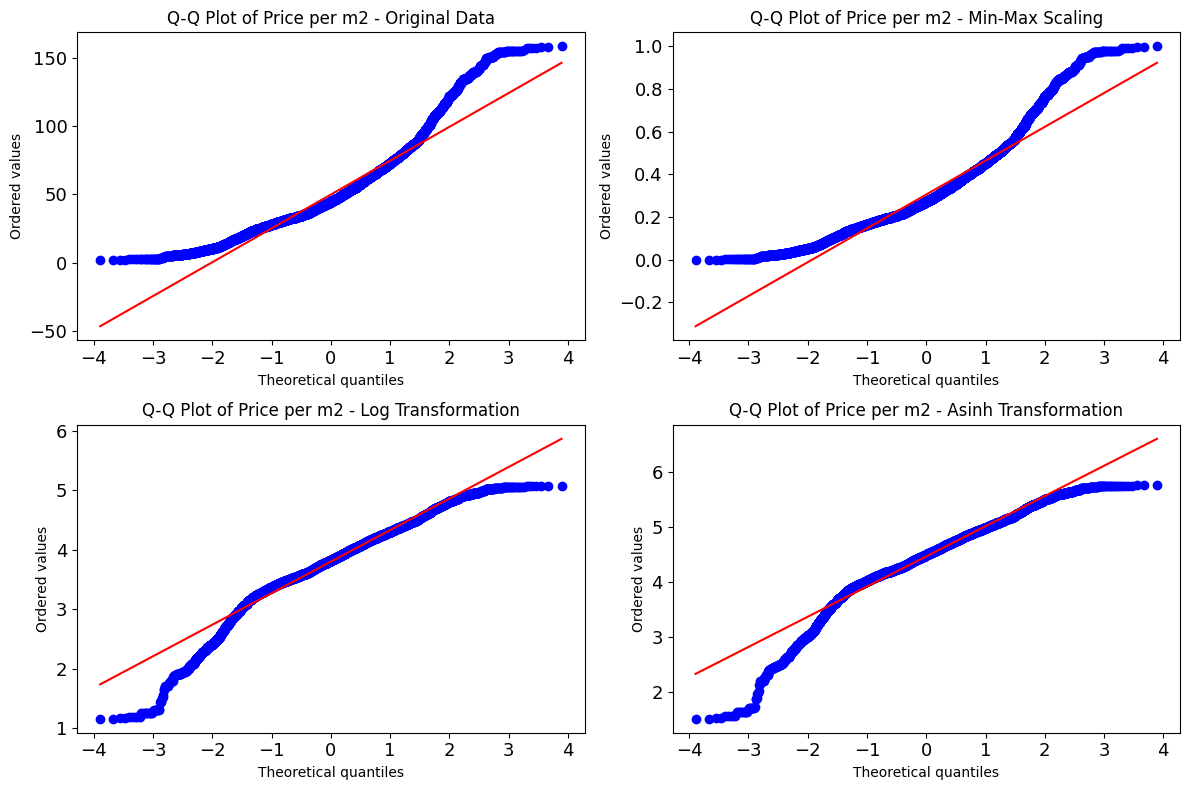

In [19]:
dfs = [df, df_minmax_scaled, df_log_transformed, df_asinh_transformed]
methods = ["Original Data", "Min-Max Scaling", "Log Transformation", "Asinh Transformation"]

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(2, 2, i)
    stats.probplot(data["Price per m2"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Price per m2 - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()

plt.show()

In [20]:
df_final = df.copy()
columns_sqrt = ["Width", "Length", "Floors", "Rooms", "Toilets"]
df_final[columns_sqrt] = df_sqrt_transformed[columns_sqrt]
df_final["Price per m2"] = df_log_transformed["Price per m2"].values

df_final.head()

,Posted Time,Width,Length,Floors,Rooms,Toilets,Price per m2,1 Part Residential,All Residential,Back Expansion,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,2.236068,4.472136,0.0,0.0,0.0,1.252763,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,2.236068,4.472136,0.0,0.0,0.0,1.252763,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,2.236068,3.872983,0.0,0.0,0.0,1.554630,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,02/02/2025,2.236068,4.472136,0.0,0.0,0.0,1.791759,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,05/02/2025,2.236068,4.472136,0.0,0.0,0.0,1.642228,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# mins = minmax_scaler.data_min_
# maxs = minmax_scaler.data_max_

# scaler_stats = {
#     'Metric': ['min', 'max'],
#     'price': [mins[0], maxs[0]]
# }

# output_dir = '../../Backend/src/main/resources/'
# os.makedirs(output_dir, exist_ok=True)

# df_minmax_stats = pd.DataFrame(scaler_stats)
# df_minmax_stats.to_csv('forecast_scaler_params.csv', index=False)

# output_path = os.path.join(output_dir, 'forecast_scaler_params.csv')
# df_minmax_stats.to_csv(output_path, index=False)

# print("File 'forecast_scaler_params.csv' has been successfully created!")


In [22]:
df_final.to_csv('TransformedData.csv', index=False)
print("DataFrame exported to CSV file.")

DataFrame exported to CSV file.


# General conclusion